Diagnosis bizim tahmin etmek istediğimiz sütun.

M = malignant(kötü huylu) = 0 
B = benign(iyi huylu) = 1 

Makine öğrenmesi modelleri ikiye ayrılır Regresyonlar ve Classificationlar. Regresyonlar aralık verir, Classification (sınıflandırma) da ise bize net bir şey verir.

Veri seti 569 satır ve 32 sütun içeriyor. 
'Diagnosis' kısmı kanserin M = kötü huylu mu yoksa B = iyi huylu mu olduğunu söyleyen, tahminin yapılacağı sütundur. 

1, kanserin kötü huylu olduğu, 0 ise iyi huylu olduğu anlamına gelir. 
569 kişiden 357'sinin B (iyi huylu) ve 212'sinin M (kötü huylu) olarak etiketlendiğini tespit edebiliriz.


In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


# Veri setini yükleme
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
column_names = ["ID", "Diagnosis", "Mean Radius", "Mean Texture", "Mean Perimeter", "Mean Area", 
                "Mean Smoothness", "Mean Compactness", "Mean Concavity", "Mean Concave Points",
                "Mean Symmetry", "Mean Fractal Dimension", "SE Radius", "SE Texture", "SE Perimeter",
                "SE Area", "SE Smoothness", "SE Compactness", "SE Concavity", "SE Concave Points",
                "SE Symmetry", "SE Fractal Dimension", "Worst Radius", "Worst Texture", "Worst Perimeter",
                "Worst Area", "Worst Smoothness", "Worst Compactness", "Worst Concavity",
                "Worst Concave Points", "Worst Symmetry", "Worst Fractal Dimension"]

data = pd.read_csv(url, names=column_names)

# İlk sütun "ID" olduğu için 2. sütundan (indeks 1) başlayarak son sütuna (indeks 30) kadar olan sütunları seçiyoruz.
#data = pd.read_csv(url, usecols=range(1, 32), names=column_names)


#shape ile veri setinin boyutları hakkında bilgi edinebiliriz-> Veri seti 569 satır ve 32 sütun içeriyor.(569, 32)
print("Cancer data set dimensions : {}".format(data.shape))

#Diagnosis sütununun dağılımını görüntüler ->B:357 ve M: 212
print("Distribution of data: ", data['Diagnosis'].value_counts()) 


'''
1, kanserin kötü huylu olduğu, 0 ise iyi huylu olduğu anlamına gelir. 
569 kişiden 357'si B (iyi huylu) ve
212 M (kötü huylu) olarak etiketlendiğini tespit edebiliriz.

'''

print(data)


Cancer data set dimensions : (569, 32)
Distribution of data:  Diagnosis
B    357
M    212
Name: count, dtype: int64
           ID Diagnosis  Mean Radius  Mean Texture  Mean Perimeter  Mean Area   
0      842302         M        17.99         10.38          122.80     1001.0  \
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     126

In [24]:
#Alternatif yöntem OneHotEncoder için
#data[data['Diagnosis'] == 'M'] = 1
#data[data['Diagnosis'] == 'B'] = 0

In [13]:
# Kullanılan Kütüphane
from sklearn.preprocessing import OneHotEncoder

# metinsen veriyi (B ve M) int hale getirir (0 ve 1)

# Sınıf etiketlerini One-Hot Encoding ile dönüştürme
y = data["Diagnosis"].values  #Diagnosis sütununun değerlerini bir NumPy dizisine kopyalar.
onehotencoder = OneHotEncoder()
Y = onehotencoder.fit_transform(y.reshape(-1, 1)).toarray()

print("Diagnosis after one-hot encoding are: \n", Y)

Diagnosis after one-hot encoding are: 
 [[0. 1.]
 [0. 1.]
 [0. 1.]
 ...
 [0. 1.]
 [0. 1.]
 [1. 0.]]


In [15]:
# Kullanılan Kütüphane
from sklearn.model_selection import train_test_split

# Veriyi eğitim ve test setlerine bölelim
X = data.iloc[:, 2:32].values #2.sütundan (indeks 1) başlayarak 32. sütuna (indeks 31) kadar olan sütunları seçiyor.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

print("Shape of training data is: ", X_train.shape)
print("Shape of testing data is: ", X_test.shape)

Shape of training data is:  (455, 30)
Shape of testing data is:  (114, 30)


In [16]:
# Kullanılan Kütüphane
from sklearn.preprocessing import StandardScaler

# Veriyi ölçeklendirme (StandardScaler kullanarak)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

print(X)  #Scaled values

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]


In [17]:
# Meme kanseri sınıflandırma modelinin tasarımı

# Kullanılan Kütüphaneler
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

model = Sequential(name='BreastCancer')

model.add(Dense(64, activation='relu', input_dim=X_train.shape[1], name='Hidden-1'))
model.add(Dense(64, activation='relu', name='Hidden-2'))
model.add(Dense(2, activation='softmax', name='Output')) # Meme kanseri için 2 sınıf (Malignant ve Benign)

model.summary()

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

hist = model.fit(X_train, Y_train, batch_size=32, epochs=200, validation_split=0.2)


Model: "BreastCancer"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden-1 (Dense)            (None, 64)                1984      
                                                                 
 Hidden-2 (Dense)            (None, 64)                4160      
                                                                 
 Output (Dense)              (None, 2)                 130       
                                                                 
Total params: 6,274
Trainable params: 6,274
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
12/12 [==============================] - 0s 9ms/step - loss: 0.4695 - accuracy: 0.8709 - val_loss: 0.3190 - val_accuracy: 0.9341
Epoch 2/200
12/12 [==============================] - 0s 2ms/step - loss: 0.2277 - accuracy: 0.9505 - val_loss: 0.1845 - val_accuracy: 0.9451
Epoch 3/200
12/12 [===============

12/12 [==============================] - 0s 3ms/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 0.0508 - val_accuracy: 0.9780
Epoch 54/200
12/12 [==============================] - 0s 3ms/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.0506 - val_accuracy: 0.9780
Epoch 55/200
12/12 [==============================] - 0s 2ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.0521 - val_accuracy: 0.9780
Epoch 56/200
12/12 [==============================] - 0s 3ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.0512 - val_accuracy: 0.9780
Epoch 57/200
12/12 [==============================] - 0s 3ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 0.0508 - val_accuracy: 0.9780
Epoch 58/200
12/12 [==============================] - 0s 3ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 0.0526 - val_accuracy: 0.9780
Epoch 59/200
12/12 [==============================] - 0s 3ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.0531 - val_accuracy: 0.9780
Epoch 60/200
12/12 

Epoch 110/200
12/12 [==============================] - 0s 2ms/step - loss: 4.3380e-04 - accuracy: 1.0000 - val_loss: 0.0607 - val_accuracy: 0.9670
Epoch 111/200
12/12 [==============================] - 0s 2ms/step - loss: 4.2384e-04 - accuracy: 1.0000 - val_loss: 0.0608 - val_accuracy: 0.9670
Epoch 112/200
12/12 [==============================] - 0s 2ms/step - loss: 4.1301e-04 - accuracy: 1.0000 - val_loss: 0.0608 - val_accuracy: 0.9670
Epoch 113/200
12/12 [==============================] - 0s 3ms/step - loss: 4.1266e-04 - accuracy: 1.0000 - val_loss: 0.0604 - val_accuracy: 0.9670
Epoch 114/200
12/12 [==============================] - 0s 2ms/step - loss: 3.9716e-04 - accuracy: 1.0000 - val_loss: 0.0608 - val_accuracy: 0.9670
Epoch 115/200
12/12 [==============================] - 0s 2ms/step - loss: 3.8976e-04 - accuracy: 1.0000 - val_loss: 0.0616 - val_accuracy: 0.9670
Epoch 116/200
12/12 [==============================] - 0s 2ms/step - loss: 3.7663e-04 - accuracy: 1.0000 - val_loss: 0

Epoch 166/200
12/12 [==============================] - 0s 2ms/step - loss: 1.4370e-04 - accuracy: 1.0000 - val_loss: 0.0678 - val_accuracy: 0.9670
Epoch 167/200
12/12 [==============================] - 0s 3ms/step - loss: 1.4319e-04 - accuracy: 1.0000 - val_loss: 0.0678 - val_accuracy: 0.9670
Epoch 168/200
12/12 [==============================] - 0s 2ms/step - loss: 1.4042e-04 - accuracy: 1.0000 - val_loss: 0.0671 - val_accuracy: 0.9670
Epoch 169/200
12/12 [==============================] - 0s 3ms/step - loss: 1.4083e-04 - accuracy: 1.0000 - val_loss: 0.0672 - val_accuracy: 0.9670
Epoch 170/200
12/12 [==============================] - 0s 2ms/step - loss: 1.3654e-04 - accuracy: 1.0000 - val_loss: 0.0684 - val_accuracy: 0.9670
Epoch 171/200
12/12 [==============================] - 0s 2ms/step - loss: 1.3212e-04 - accuracy: 1.0000 - val_loss: 0.0689 - val_accuracy: 0.9670
Epoch 172/200
12/12 [==============================] - 0s 3ms/step - loss: 1.3045e-04 - accuracy: 1.0000 - val_loss: 0

In [7]:
#compile etmek 1 defa yeterli.Birden fazla fit metodu çağrılırsa kaldığı yerden eğitim yapar.
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, Y_train, epochs=100, batch_size=10)

Epoch 1/100
46/46 [==============================] - 0s 667us/step - loss: 0.0090 - accuracy: 0.9956
Epoch 2/100
46/46 [==============================] - 0s 667us/step - loss: 0.0060 - accuracy: 0.9956
Epoch 3/100
46/46 [==============================] - 0s 667us/step - loss: 0.0044 - accuracy: 0.9978
Epoch 4/100
46/46 [==============================] - 0s 667us/step - loss: 0.0011 - accuracy: 1.0000
Epoch 5/100
46/46 [==============================] - 0s 645us/step - loss: 5.8908e-04 - accuracy: 1.0000
Epoch 6/100
46/46 [==============================] - 0s 690us/step - loss: 4.4527e-04 - accuracy: 1.0000
Epoch 7/100
46/46 [==============================] - 0s 645us/step - loss: 3.6643e-04 - accuracy: 1.0000
Epoch 8/100
46/46 [==============================] - 0s 667us/step - loss: 3.1610e-04 - accuracy: 1.0000
Epoch 9/100
46/46 [==============================] - 0s 690us/step - loss: 2.8569e-04 - accuracy: 1.0000
Epoch 10/100
46/46 [==============================] - 0s 667us/step - l

46/46 [==============================] - 0s 645us/step - loss: 1.6697e-05 - accuracy: 1.0000
Epoch 79/100
46/46 [==============================] - 0s 645us/step - loss: 1.5992e-05 - accuracy: 1.0000
Epoch 80/100
46/46 [==============================] - 0s 667us/step - loss: 1.5403e-05 - accuracy: 1.0000
Epoch 81/100
46/46 [==============================] - 0s 667us/step - loss: 1.5210e-05 - accuracy: 1.0000
Epoch 82/100
46/46 [==============================] - 0s 690us/step - loss: 1.4680e-05 - accuracy: 1.0000
Epoch 83/100
46/46 [==============================] - 0s 690us/step - loss: 1.4106e-05 - accuracy: 1.0000
Epoch 84/100
46/46 [==============================] - 0s 645us/step - loss: 1.4044e-05 - accuracy: 1.0000
Epoch 85/100
46/46 [==============================] - 0s 645us/step - loss: 1.3394e-05 - accuracy: 1.0000
Epoch 86/100
46/46 [==============================] - 0s 667us/step - loss: 1.3051e-05 - accuracy: 1.0000
Epoch 87/100
46/46 [==============================] - 0s 66

In [18]:
# Test verileri üzerinde modeli değerlendirme
test_loss, test_accuracy = model.evaluate(X_test, Y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

4/4 [==============================] - 0s 1ms/step - loss: 0.3603 - accuracy: 0.9561
Test Loss: 0.3602626621723175
Test Accuracy: 0.9561403393745422


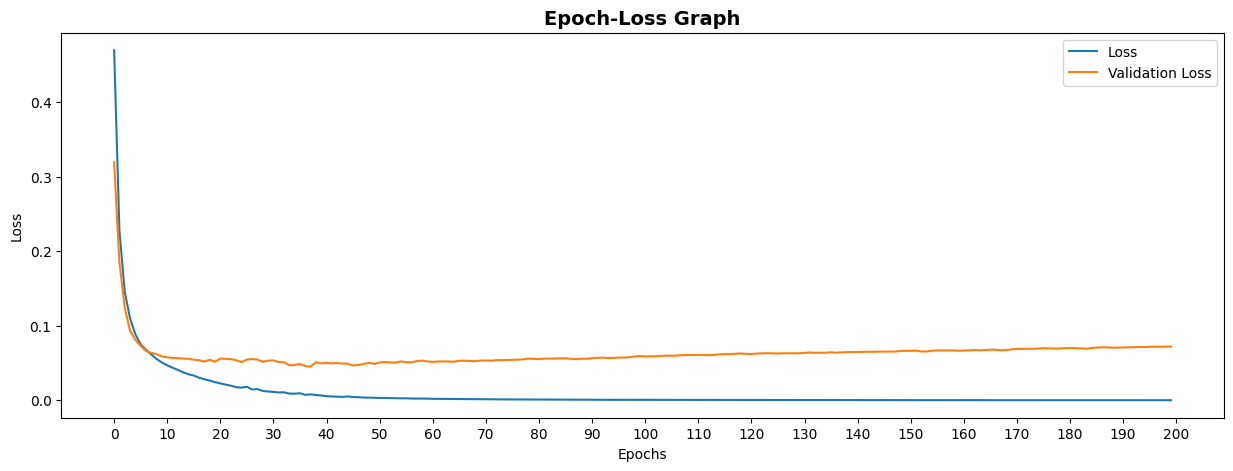

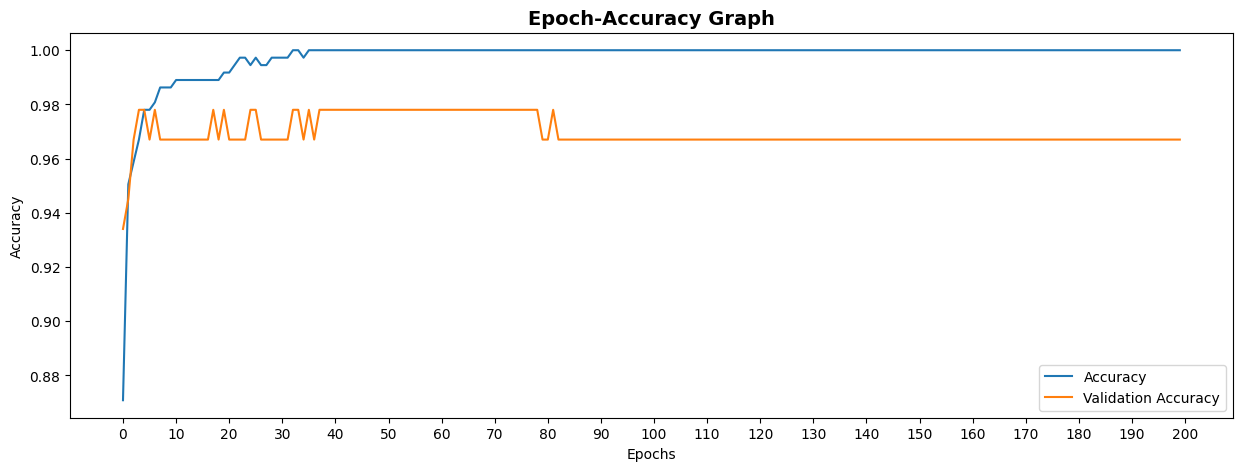

In [19]:
# Loss ve doğruluk grafiği çizimi

# Kullanılan Kütüphane
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))
plt.title('Epoch-Loss Graph', fontsize=14, fontweight='bold')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks(range(0, 210, 10))

plt.plot(hist.epoch, hist.history['loss'])
plt.plot(hist.epoch, hist.history['val_loss'])
plt.legend(['Loss', 'Validation Loss'])

plt.show()

plt.figure(figsize=(15, 5))
plt.title('Epoch-Accuracy Graph', fontsize=14, fontweight='bold')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xticks(range(0, 210, 10))

plt.plot(hist.epoch, hist.history['accuracy'])
plt.plot(hist.epoch, hist.history['val_accuracy'])
plt.legend(['Accuracy', 'Validation Accuracy'])
plt.show()


In [21]:
# Modeli kaydetme

#model.save('breast_cancer.h5', save_format='h5')
model.save('my_model.keras') #burada model bu şekilde kaydediliyormuş

# Tahminler yapma
from tensorflow.keras.models import load_model

#model = load_model('breast_cancer.h5')

model = load_model('my_model.keras') 


# Örnek verileri tahmin etme
predict_data = np.array([[17.99, 10.38, 122.8, 1001, 0.1184, 0.2776, 0.3001, 0.1471, 0.2419, 0.07871,
                          1.095, 0.9053, 8.589, 153.4, 0.006399, 0.04904, 0.05373, 0.01587, 0.03003,
                          0.006193, 25.38, 17.33, 184.6, 2019, 0.1622, 0.6656, 0.7119, 0.2654, 0.4601,
                          0.1189]])

# Örnek verileri ölçeklendirme
transformed_predict_data = sc.transform(predict_data)

# Tahmin yapma
predict_result = model.predict(transformed_predict_data)


# Tahmin sonuçlarını yazdırma
for i in range(len(predict_result)):
    if predict_result[i, 1] > 0.5:
        print('Malignant (Kötü Huylu)')
    else:
        print('Benign (İyi Huylu)')
        

1/1 [==============================] - 0s 28ms/step
Malignant (Kötü Huylu)
